In [ ]:
# for Mathematical and Dataframe Operations
import numpy as np
import pandas as pd
# for Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('BostonHousing.csv') #reading the csv file


In [ ]:
df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

<ipython-input-32-8490618771fd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
<ipython-input-32-8490618771fd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
<ipython-input-32-8490618771fd>:5: UserWarning: 

`distplot` is a deprecated function and will be 

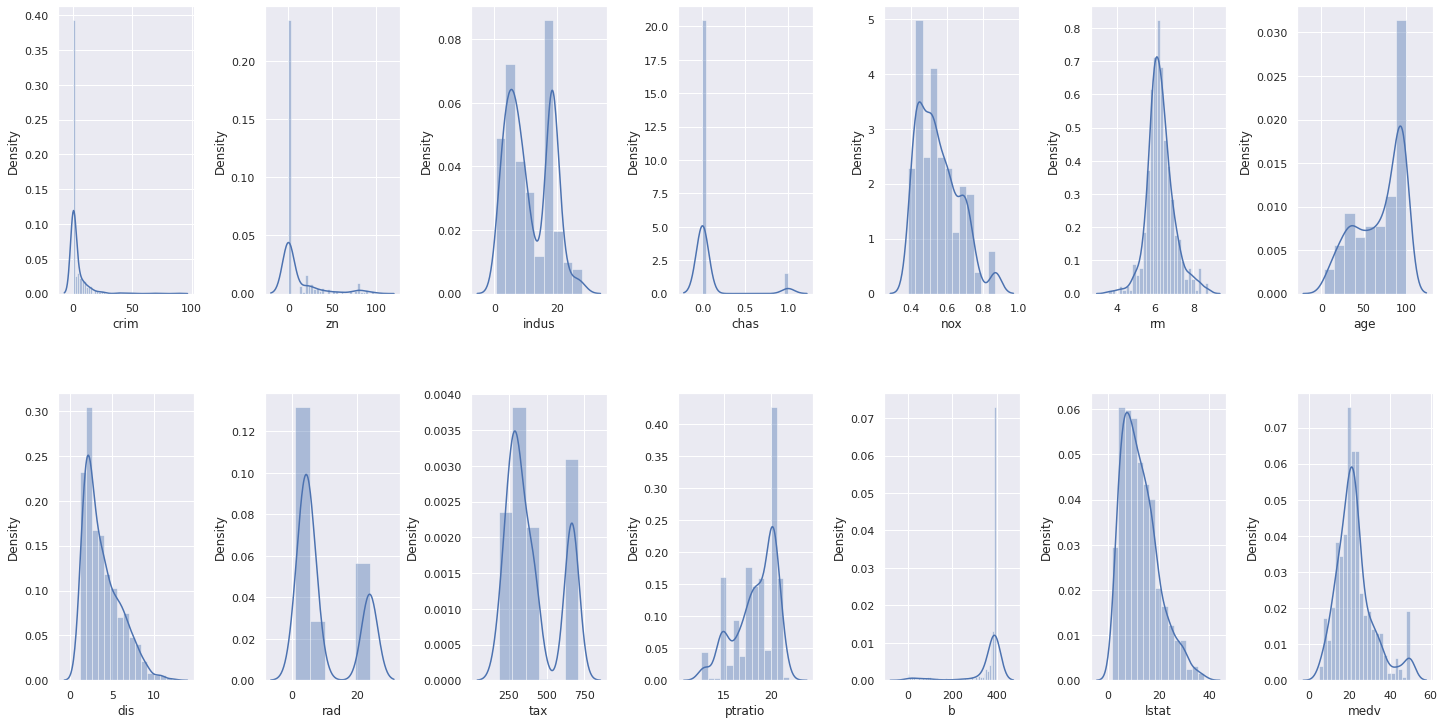

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

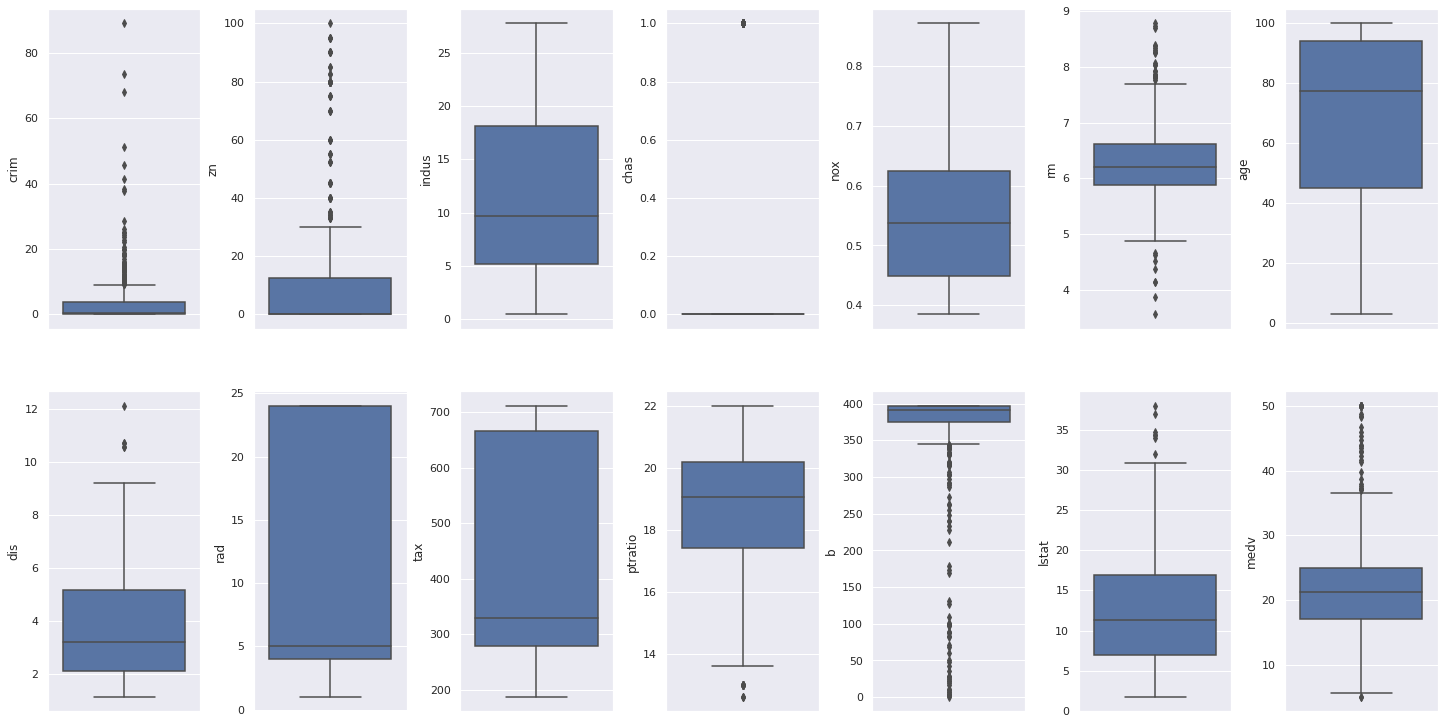

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [ ]:
df['medv']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from scipy import stats

def data_cleaning(df,target):
  # fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
  # index = 0
  # axs = axs.flatten()
  #  ROW - removing useless rows

  df=df[df.isnull().sum(axis=1)<=((len(df.columns))*80/100)]# remove rows that have more than 80% null values in
  df = df[~np.isnan(df[target])]#remove row if target column has no value
  df= df.drop_duplicates() # remove all duplicated rows
  
  # COL -
  for col in df.columns:
    # 1) unique values in column
    if df[col].nunique()+df[col].isnull().sum()==df.shape[0] : #remove col if all values have unique num
        df.pop(col)
        print(col ," has unique values hence removed") 
        continue 

    # 2) constant values in column   
    elif df[col].value_counts().iloc[0] == df.shape[0]:
       df.pop(col)
       print(col ," has constant values hence removed") 
       continue 
    
    # 3) null values in column
    elif df[col].isnull().sum()>0: 
        print(col, df[col].dtypes," has ", df[col].isnull().sum(), " null values " , (df.shape[0]-df[col].isnull().sum())/100,"% \n")
        if df[col].isnull().sum()>0.8*df.shape[0]: 
          df.pop(col)   # remove col if col has more than 80% null values
          print(col," removed as had more than 80% null values\n")
          continue
        else:   # choose what to do with the col if col has less than 80% null values
          choice=int(input("do you want to \n 1) delete the column \n 2)fill it automatically? \n 3)fill it in with value given by you \n"))
          if choice ==1: 
            df.pop(col)
            continue
            print(col,"has been deleted\n")
          elif choice ==2:
            if df[col].dtypes=="float":
              df[col]=df[col].fillna(df[col].median()) ###group by class
              print(col," null values has been filled with ",df[col].median(),"\n")
            elif df[col].dtypes=="object" or df[col].dtypes=="int" :
              df[col]=df[col].fillna(df[col].mode()[0])    
              print(col," null values has been filled with ",df[col].mode()[0],"\n")
          elif choice ==3: 
            value=df[col].dtypes(input("enter any value of type ",df[col].dtypes),"\n" ) 
            df[col]=df[col].fillna(value)
          else: print("invalid choice") 

      #data transformation

    # 4) object col to int - 
    if df[col].dtypes=="object": #
          df[col]=le.fit_transform(df[col])#replaces old col object values with encode col
    # 5) deal with outliers or noise in continous col    
    elif df[col].dtypes=="float":
        # sns.boxplot(df[col]) # to check outliers
        # Interquartile range (IQR)
        print("\n",col)
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        IQR=q3-q1
        lower_outlier_range=(q1-1.5*IQR)
        upper_outlier_range=(q1+1.5*IQR)
        outliers = df[col][((df[col]<(lower_outlier_range)) | (df[col]>(upper_outlier_range)))]
        print("outliers : ",len(outliers), " oulliers that means ",((len(outliers)/df.shape[0])/100)," % of rows are outiers" )
        # print("total number of rows: ",df.shape[0])
        # print("max outlier value: ",outliers.max())
        # print("min outlier value: ",outliers.min())
        outlier_choice=int(input("what would you do with the outliers \n1) remove \n2) capping"))
        if outlier_choice==2:
            df[col].values[df[col].values<lower_outlier_range]=lower_outlier_range
            df[col].values[df[col].values>upper_outlier_range]=upper_outlier_range
            print("outliers have been capped")
        elif outlier_choice==1:
            # get indexes for which column value is more than upper_outlier_range & less than lower_outlier_range
            outliers_indexs = df[ (df[col] > upper_outlier_range) & (df[col] <lower_outlier_range)].index 
            # drop these given row # indexes from dataFrame
            df.drop(outliers_indexs, inplace = True) 
            print("outliers have been removed 1",)
            df=df[~(df[col]>upper_outlier_range & (df[col] <lower_outlier_range))]
            print("outliers have been removed 2",)
        # sns.boxplot(y=k, data=df, ax=axs[index])
        # index += 1
        print("skew :  ",df[col].skew())

    # 6) remove skewnes - continous column to normalized value           
        if df[col].skew()>1 or df[col].skew()<-1:
            print("Skewness in Column before Box cox transformation: " ,df[col].skew())
            # col_cox , lam = stats.boxcox(df[col])[0:2] #for non -ve
            df[col]=np.log1p(df[col])
            print("Skewness in Column afterBox cox transformation: " ,df[col].skew())#pd.Series(col_cox).skew()
            # df[col] = col_cox
        # sns.distplot(v, ax=axs[index])
            

    # 7) less corelated rows if column
    if abs(df[col].corr(df[target]))<0.05:
      print(col ," has less corelation with the target variable hence removed ", df[col].corr(df[target])) 
      df.pop(col)
      continue

  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
  return df

df= data_cleaning(df,'medv')



 crim
outliers :  102  oulliers that means  4.04  % of rows are outiers
what would you do with the outliers 
1) remove 
2) capping2
outliers have been capped
skew :   0.9987578043340828

 zn
outliers :  122  oulliers that means  3.84  % of rows are outiers
what would you do with the outliers 
1) remove 
2) capping2
outliers have been capped
skew :   1.0989163541637899
Skewness in Column before Box cox transformation:  1.0989163541637899
Skewness in Column afterBox cox transformation:  1.074076215431834

 indus
outliers :  12  oulliers that means  4.94  % of rows are outiers
what would you do with the outliers 
1) remove 
2) capping2
outliers have been capped
skew :   0.23075551391152718

 nox
outliers :  61  oulliers that means  4.45  % of rows are outiers
what would you do with the outliers 
1) remove 
2) capping2
outliers have been capped
skew :   0.27714380735807276

 rm
outliers :  73  oulliers that means  4.33  % of rows are outiers
what would you do with the outliers 
1) remove 

<Figure size 432x288 with 0 Axes>

In [ ]:
df.sample(10)

crim        zn  indus  chas     nox      rm    age     dis  rad  tax  \
453  5.474601  0.000000  18.10     0  0.7115  6.9925   99.3  2.4527   24  666   
66   0.043790  2.983153   3.37     0  0.3980  5.7870   31.1  6.6115    4  337   
323  0.283920  0.000000   7.38     0  0.4930  5.7080   74.3  4.7211    5  287   
295  0.129320  0.000000  13.92     0  0.4370  6.6780   31.1  5.9604    4  289   
280  0.035780  2.983153   3.33     0  0.4429  6.9925   64.5  4.6947    5  216   
77   0.087070  0.000000  12.83     0  0.4370  6.1400   45.8  4.0905    5  398   
8    0.211240  2.602690   7.87     0  0.5240  5.6310  100.0  6.0821    5  311   
383  5.474601  0.000000  18.10     0  0.7000  5.5200  100.0  1.5331   24  666   
240  0.113290  2.983153   4.93     0  0.4280  6.8970   54.3  6.3361    6  300   
411  5.474601  0.000000  18.10     0  0.5970  6.6570  100.0  1.5275   24  666   

     ptratio         b    lstat     medv  
453     20.2  5.931900  16.7400  17.8000  
66      16.1  5.986201  10.2400  19.4000  
323     19.6  5.971593  11.7400  18.5000  
295     16.0  5.986201   6.2700  28.6000  
280     14.9  5.961804   3.7600  28.9875  
77      18.7  5.960902  10.2700  20.8000  
8       15.2  5.960051  21.9575  16.5000  
383     20.2  5.986201  21.9575  12.3000  
240     16.6  5.971899  11.3800  22.0000  
411     20.2  5.843852  21.2200  17.2000

In [ ]:
from imblearn.combine import SMOTEENN
sn=SMOTEENN(random_state=0)
from sklearn.preprocessing import StandardScaler,MinMaxScaler
mmsc=MinMaxScaler()
def data_x_y_spliting(df,target):
 # spliting x,y
    x=df.drop([target], axis=1)
    x_col_names = x.columns
    y=df[target].to_frame() 

 #standarization of x   
    x= mmsc.fit_transform(x) # we dont wnat to tranform the y values
    x = pd.DataFrame(x, columns=x_col_names)

    prediction_choice=int(input("1) regression \n 2) classifiaction"))
#balancing the target class
    if prediction_choice==2:
      print("number of class in the target before sampling")
      print(y.value_counts())
      target_class=list(y.value_counts())
      if len(target_class)>50:
        print("too many classes in target variable")
        #deal with this later
      else:
          # allClassMean= np.mean(target_class)  
        # for eachClassCount in target_class:
          # if abs(allClassMean-eachClassCount)>=0.2*allClassMean:
            print("classes are imbalanced")
            sn.fit(x,y)
            x,y =sn.fit_resample(x,y)
            print("number of class in the target after sampling")
            print(y.value_counts())
          # else:   
            print("classes are fairly not imbalanced")

    elif prediction_choice==1:
      print("regression")
    return x,y

x ,y=  data_x_y_spliting(df,'medv')

1) regression 
 2) classifiaction1
regression


In [ ]:
x.shape

(506, 13)

In [ ]:
y.shape

(506, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0 ) #20% will be test 
# random state=0 to get same values for train &test every time we run it
print('Shape of X_train is ', X_train.shape)
print('Shape of X_test is ', X_test.shape)
print('Shape of Y_train is ', Y_train.shape)
print('Shape of Y_test is ', Y_test.shape)

Shape of X_train is  (404, 13)
Shape of X_test is  (102, 13)
Shape of Y_train is  (404, 1)
Shape of Y_test is  (102, 1)


In [ ]:
def regression_models_performance_measure (ytest,ypred):
  from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
  mae= mean_absolute_error (ytest,ypred)# mean or average of all the errors
  mse= mean_squared_error (ytest,ypred) #better tahn mse as focus is more on large error due to square term and penelizes teh model for erors better but unit is also squared
  rmse= mean_squared_error (ytest,ypred, squared=False)# better than mse as RMSE penalizes the model more effectively than “MAE” when it makes bad predictions and has the same unit of the target.
  #rae= #mean values of target and takes total absolute error and normalizes it
  r2 = r2_score(ytest,ypred) #defines how much variation in the response does the model explain
  print("MSE = ",mse)
  print("MAE = ",mae)
  print("RMSE = ",rmse)
  print("R^2 = ",r2)



def regression_models(X_train, X_test, Y_train, Y_test):
  from sklearn.linear_model import LinearRegression,Ridge
  m1=LinearRegression().fit(X_train, Y_train)
  ypred1= m1.predict(X_test)
  s1=m1.score(X_test,Y_test)
  print(m1)
  regression_models_performance_measure(Y_test,ypred1)
  print("score: ",s1)

  m12=Ridge().fit(X_train, Y_train)
  ypred12= m12.predict(X_test)
  s12=m12.score(X_test,Y_test)
  print(m12)
  regression_models_performance_measure(Y_test,ypred12)
  print("score: ",s12)

  from sklearn.ensemble import GradientBoostingRegressor  
  m2 = GradientBoostingRegressor().fit(X_train, Y_train)
  ypred2= m2.predict(X_test)
  s2=m2.score(X_test,Y_test)
  print(m2)
  regression_models_performance_measure(Y_test,ypred2)
  print("score: ",s2)
  print() 

  from xgboost.sklearn import XGBRegressor 
  m21 = XGBRegressor().fit(X_train, Y_train)
  ypred21= m21.predict(X_test)
  s21=m21.score(X_test,Y_test)
  print(m21)
  regression_models_performance_measure(Y_test,ypred2)
  print("score: ",s21)
  print() 

  from sklearn.linear_model import BayesianRidge
  m3 = BayesianRidge().fit(X_train, Y_train)
  ypred3= m3.predict(X_test)
  s3=m3.score(X_test,Y_test)
  print(m3)
  regression_models_performance_measure(Y_test,ypred3)
  print("score: ",s3)
  print()

  # from sklearn.naive_bayes import GaussianNB #for non -ve values only
  # m2 = GaussianNB().fit(X_train, Y_train)
  # ypred2= m2.predict(X_test)
  # s2=m2.score(X_test,Y_test)
  # print(m2)
  # regression_models_performance_measure(Y_test,ypred2)
  # print("score: ",s2)
  # print()

  # from sklearn.naive_bayes import MultinomialNB
  # m3 = MultinomialNB(alpha=1.0,fit_prior=True).fit(X_train, Y_train)
  # ypred3= m3.predict(X_test)
  # s3=m3.score(X_test,Y_test)
  # print(m3)
  # regression_models_performance_measure(Y_test,ypred3)
  # print("score: ",s3)
  # print()


  from sklearn.svm import SVR
  m4=SVR(
      # kernel='linear'
      ).fit(X_train, Y_train)
  ypred4= m4.predict(X_test)
  s4=m4.score(X_test,Y_test)
  print(m4)
  regression_models_performance_measure(Y_test,ypred4)
  print("score: ",s4)
  print()

  from sklearn.tree import DecisionTreeRegressor
  m5= DecisionTreeRegressor(random_state = 0).fit(X_train, Y_train)
  ypred5= m5.predict(X_test)
  s5=m5.score(X_test,Y_test)
  print(m5)
  regression_models_performance_measure(Y_test,ypred5)
  print("score: ",s5)
  print()

  from sklearn.ensemble import RandomForestRegressor
  m6 = RandomForestRegressor(n_jobs = -1, n_estimators = 100 , min_samples_leaf = 5, max_features = 0.5, oob_score = True).fit(X_train, Y_train)
  ypred6= m6.predict(X_test)
  s6=m6.score(X_test,Y_test)
  print(m6)
  regression_models_performance_measure(Y_test,ypred6)
  print("score: ",s6)
  print()
  
  from sklearn.neighbors import KNeighborsRegressor 
  m7 = KNeighborsRegressor (n_neighbors=10 , metric= 'minkowski' , p = 4).fit(X_train, Y_train)
  ypred7= m7.predict(X_test)
  s7=m7.score(X_test,Y_test)
  print(m7)
  regression_models_performance_measure(Y_test,ypred7)
  print("score: ",s7)
  print() 


  #Recall, precision, fscore plotting
  sns.set()
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  Models = ['LR','RLR','GBR','XGB','BR', 'SVR','DTC','RFC','KNR']
  Accuracy=[s1,s12,s2,s21,s3,s4,s5,s6,s7]
  ax.bar(Models,Accuracy,color=['#102963','#5a2be2','#9966cc','#df73ff','#702763','#502763','#4023','#4023','#E6E6FA'],label=Accuracy);
  for i in ax.patches:
      ax.text(i.get_x()+.1, i.get_height()-5.5, str(round(i.get_height(),2))+'%', fontsize=15, color='white')
  plt.title('Comparison of Different Regression Models');
  plt.ylabel('Accuracy');
  plt.xlabel('Regression Models');

  plt.show();
  print()



**MSE: **

Advantages:
- Easy to calculate 
- Can be used with any model
- Provides an overall measure of how well the model is doing 

Disadvantages:
- Does not provide a measure of bias
- Does not provide insight into the direction of the errors (e.g. under- or over-estimation)

**RMSE:**

Advantages:
- Provides an overall measure of how well the model is doing
- Provides an indication of the direction of the errors (e.g. under- or over-estimation)

Disadvantages:
- Can be sensitive to outliers

**MAE:**

Advantages:
- Easy to calculate 
- Provides an indication of the direction of the errors (e.g. under- or over-estimation)
- Less sensitive to outliers than RMSE

Disadvantages:
- Does not provide an overall measure of how well the model is doing

**R2:**

Advantages:
- Provides an overall measure of how well the model is doing
- Easy to interpret

Disadvantages:
- Does not provide an indication of the direction of the errors (e.g. under- or over-estimation)

Where to use each one:
- MSE: When you want to get an overall measure of how well the model is doing.  can be used for linear regression datasets.
- RMSE: When you want to get an overall measure of how well the model is doing and an indication of the direction of the errors.  can be used for linear regression datasets.
- MAE: When you want to get an indication of the direction of the errors and less sensitivity to outliers. can be used for non linear regression datasets.
- R2: When you want to get an overall measure of how well the model is doing and easy to interpret results. can be used for linear regression datasets.


LinearRegression()
MSE =  11.798382248071503
MAE =  2.481062174662554
RMSE =  3.4348773264953003
R^2 =  0.6255431719163778
score:  0.6255431719163778
Ridge()
MSE =  12.12034896898998
MAE =  2.5002260493931594
RMSE =  3.4814291561067243
R^2 =  0.6153245983417401
score:  0.6153245983417401
GradientBoostingRegressor()
MSE =  8.776083725964229
MAE =  2.005522094196937
RMSE =  2.9624455650634713
R^2 =  0.7214648240814526
score:  0.7214648240814526



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
MSE =  8.776083725964229
MAE =  2.005522094196937
RMSE =  2.9624455650634713
R^2 =  0.7214648240814526
score:  0.7353260842500571

BayesianRidge()
MSE =  11.88269225516387
MAE =  2.4836648876487946
RMSE =  3.447128117022033
R^2 =  0.6228673425384412
score:  0

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-42-6236f691e5aa>:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m6 = RandomForestRegressor(n_jobs = -1, n_estimators = 100 , min_samples_leaf = 5, max_features = 0.5, oob_score = True).fit(X_train, Y_train)


RandomForestRegressor(max_features=0.5, min_samples_leaf=5, n_jobs=-1,
                      oob_score=True)
MSE =  10.043030418087918
MAE =  2.2060553582062727
RMSE =  3.1690740632064625
R^2 =  0.6812544944185687
score:  0.6812544944185687

KNeighborsRegressor(n_neighbors=10, p=4)
MSE =  15.6146680759804
MAE =  2.65593137254902
RMSE =  3.951539962594381
R^2 =  0.504421965963517
score:  0.504421965963517



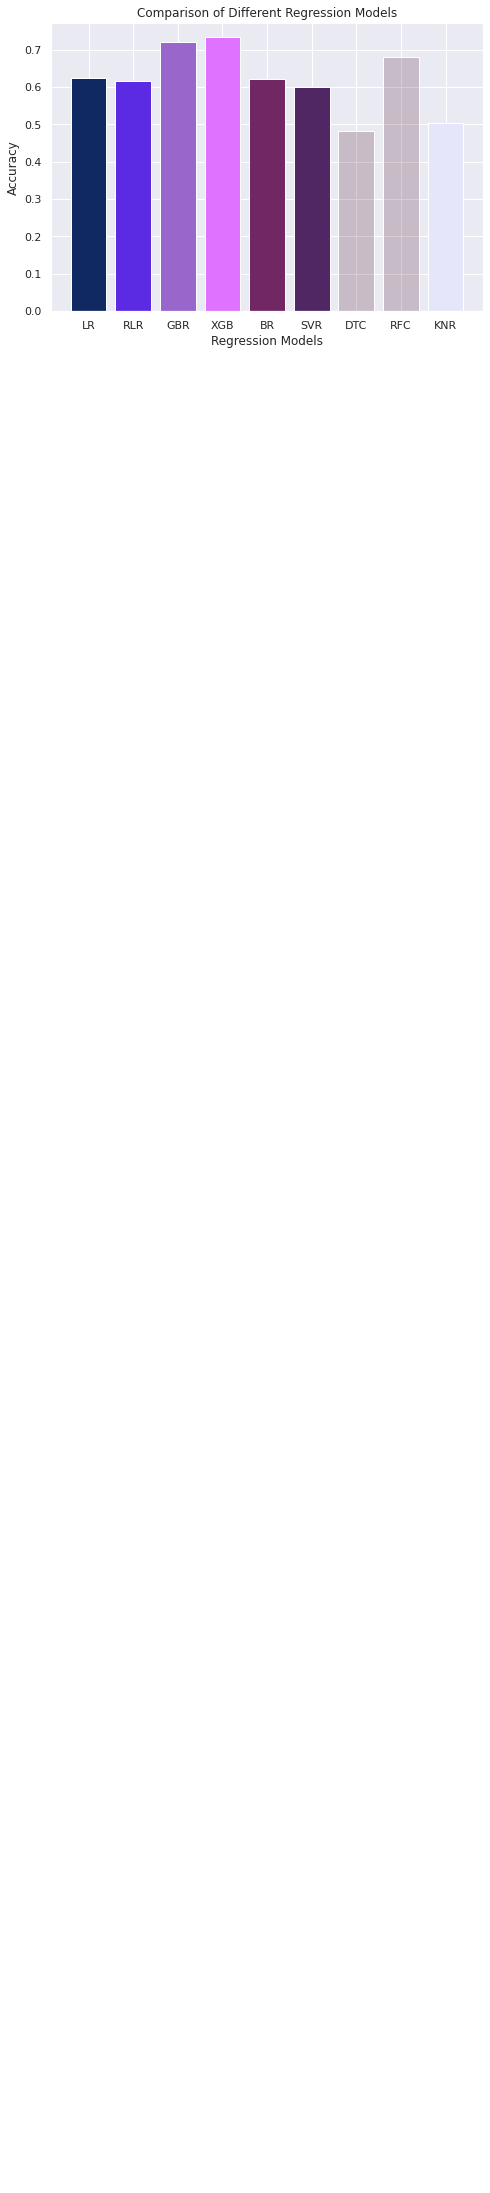

In [ ]:
regression_models(X_train, X_test, Y_train, Y_test)